# 1. Cleaning

### importing data 

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = "D:\\ironhack\\proyectos\\SharkAttack_proy1\DATA\\attacks_1.csv"
shark_attack = pd.read_csv(csv_file, encoding="cp1252")

In [3]:
shark_attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
shark_attack.sample(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
18430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
shark_attack.shape[0]

25723

In [6]:
shark_attack.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

### Null values

In [7]:
shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
#revisar si necesito eliminar los NaN
#puedo meterme directo a explorar la columna a ver como se ven con los NaN
#llamando el key y poniendole .isna()

In [9]:
#pd.isnull(shark_attack).sum() same formula
shark_attack.isna().sum()
#for NaN, un promedio de 18000NaNs en una lista de 19803
#conclucion, demasiados NaN tendre que eliminar

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [10]:
shark_attack.notnull().sum()

Case Number               8702
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6309
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

After this filter we can see that it has tons of null data, from 25723 original rows we can see that it will let us with almos 6,000 rows. Not much information and we can clean it.


next step it will be to drop (errase) the rows that dont apport nothing to the data. 
If we throw the formula od dropna with the fuction "any" its not an option, every single row has even one missed cell, we will be applying the function "all"

In [11]:
shark_attack.dropna(how="all",inplace=True)
shark_attack

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
shark_attack.shape[0]

8703

it let us with only 8703 rows. But we still have some missing values in the cells thats wy apears in the formula below that we still have a lot of them, probably half of the columns have NANs.

In [13]:
shark_attack.isna().sum()

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

### Duplicated

In [14]:
shark_attack.shape[0]

8703

In [15]:
shark_attack.duplicated().sum()

2392

This tell us that we have 2,392 raws that are duplicated and will have to be removed, otherwise it will leave us with some false information.

In [16]:
shark_attack.drop_duplicates(inplace=True)
shark_attack.tail(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
shark_attack.shape[0]

6311

This leave us with only 6,311 rows that are not duplicated and have minimum 1 real value.
Because I can notice that there are still some rows that looks preatty empty and the few values that could have it might not be important to us and our investigation.

### columns

passing throw the Data frame I notice that theres some columns that are not relevant to our investigation, that doesnt apport anything of value that we could could benefit

In [18]:
shark_attack.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2356,1995.08.19,19-Aug-1995,1995.0,Unprovoked,TONGA,Vava’u,Near Tapana Island,Fishing,Laukau Lile,M,...,"""small shark""","S. Fonea, M.D.",1995.08.19-Lile.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1995.08.19,1995.08.19,3947.0,NaN,NaN


In [19]:
shark_attack.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

There are some columns that makes me have some interest, in wich ones we could errase because of our lak of information for us, for example the las 2 columns 'Unnamed: 22', 'Unnamed: 23', seen the samples we could see that theres only non values and actually the tittle doesn´t give us any explanetion.
We will erase them.

In [20]:
shark_attack[['Unnamed: 22', "Unnamed: 23"]].sample(5)

,Unnamed: 22,Unnamed: 23
4576,NaN,NaN
4570,NaN,NaN
622,NaN,NaN
6266,NaN,NaN
1494,NaN,NaN


In [21]:
shark_attack.drop(columns =['Unnamed: 22', "Unnamed: 23"], inplace=True, axis=1)

In [22]:
shark_attack.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
766,2012.07.08,08-Jul-2012,2012.0,Unprovoked,USA,North Carolina,"North Topsail Beach, Onslow County",Swimming,Tracy Fasick,F,...,N,17h30,NaN,"A. Brenneka, SharkAttackSurvivors.com; T.Fasick",2012.07.08-Fasick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.07.08,2012.07.08,5537.0


more research in columns: lets see if the internet links could help us with our research.

In [23]:
shark_attack['href formula'].sample(5)                        

2887    http://sharkattackfile.net/spreadsheets/pdf_di...
1301    http://sharkattackfile.net/spreadsheets/pdf_di...
427     http://sharkattackfile.net/spreadsheets/pdf_di...
6280    http://sharkattackfile.net/spreadsheets/pdf_di...
4683    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href formula, dtype: object

In [24]:
shark_attack['href'].sample(5) 

5829    http://sharkattackfile.net/spreadsheets/pdf_di...
6100    http://sharkattackfile.net/spreadsheets/pdf_di...
1664    http://sharkattackfile.net/spreadsheets/pdf_di...
80      http://sharkattackfile.net/spreadsheets/pdf_di...
1595    http://sharkattackfile.net/spreadsheets/pdf_di...
Name: href, dtype: object

Exploring this 2 columns 'href formula' and 'href' we can realice that they apporr some internet links, but going throw them they the pages dont exist amymore.

In [25]:
shark_attack['Case Number.1'].sample(5) 

1201     2008.09.28.a
1167       2009.01.23
3197     1976.00.00.b
2659       1989.10.11
25722             NaN
Name: Case Number.1, dtype: object

other columns that dont apport anything of value are 'Case Number.1', 'Case Number.2'  we can see that the information there is actually the same and its the date of the attack that we do have it already in other columns at the beginning, and 'original order' dont aport us anything.
we´ll pass to some more drop cleaning.
we also dont count with any extra file from the data page like the pdf files, so we could erase thata one to.

In [26]:
shark_attack.drop(columns =['Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order'], inplace=True, axis=1)

In [27]:
shark_attack.drop(columns =['Case Number'], inplace=True, axis=1)

In [28]:
shark_attack.sample()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species
6285,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Crew swimming alongside their anchored ship,male,M,NaN,FATAL,Y,NaN,NaN


In [29]:
shark_attack.columns = [i.capitalize().replace(" ", "_") for i in list(shark_attack.columns)]
shark_attack.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex_', 'Age', 'Injury', 'Fatal_(y/n)', 'Time', 'Species_'],
      dtype='object')

In [30]:
shark_attack.dropna(how="all",inplace=True)
shark_attack.tail(5)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Species_
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN
6301,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN


In [31]:
#for i in list(shark_attack.columns):
#    for e in range(len(i)):
#        if e == "_":
#            list(shark_attack.columns).append(e.replace("_", ""))
#shark_attack.columns

In [32]:
#for i in list(shark_attack.columns):
#    for e in len(i)if i[-1] == " ":
#        list(shark_attack.columns).append(i.replace(" ", ""))
#shark_attack.columns

In [33]:
shark_attack.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Species_
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


For this analysis Im interested in some of the columns, I will need the 'Date', 'Country', 'Injury', 'Fatal_(y/n)', 'Time' and 'Species_', I will have to go throw them and cleaning them more deep so we would not have any bias.

### Cleaning "Date"

For "Date" i will need to clean it and have it more organized, will nedd to make all data the same information, so i can calculate it the same way. will need to separate tin different columns the day, in another de month and in another the year, that we already have it. 
in this case I will need to create 2 more columns or just one and modified the others.

In [34]:
shark_attack['Date'].value_counts()

1957                          11
1942                           9
1956                           8
1958                           7
1950                           7
                              ..
01-Dec-1994                    1
Reported      10-Dec-1994      1
11-Dec-1994                    1
13-Dec-1994                    1
1845-1853                      1
Name: Date, Length: 5433, dtype: int64

In [35]:
shark_attack.dtypes

Date            object
Year           float64
Type            object
Country         object
Area            object
Location        object
Activity        object
Name            object
Sex_            object
Age             object
Injury          object
Fatal_(y/n)     object
Time            object
Species_        object
dtype: object

Se hizo el cambio de type de Date, aunque ya estaba como objeto, no me reconocia algunos cambios por que el error me aventaba que eran floats.

Crear nueva columna

In [36]:
shark_attack["Months"] = shark_attack["Date"]

Create alll elements of column Months to strings.

In [37]:
for i in shark_attack["Months"]:
    i = str(i)

In [38]:
shark_attack["Months"] = shark_attack["Months"].astype("str")

In [39]:
shark_attack["Months"].dtype

dtype('O')

Filter and clean objects to make more readable the strings

In [40]:
shark_attack['Months'] = shark_attack['Months'].str.replace(r'\d', "").replace("-", "")

C:\Users\ima_n\AppData\Local\Temp\ipykernel_21568\3293145955.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  shark_attack['Months'] = shark_attack['Months'].str.replace(r'\d', "").replace("-", "")


In [41]:
shark_attack['Months'] = shark_attack['Months'].str.replace("-", "")

In [42]:
shark_attack['Months'] = shark_attack['Months'].str.replace("or", "")

In [43]:
shark_attack['Months'] = shark_attack['Months'].str.replace("Reported", "")

In [44]:
shark_attack['Months'] = shark_attack['Months'].str.replace("Repted", "")

In [45]:
shark_attack['Months'] = shark_attack['Months'].str.replace("Late", "").replace("Early", "")

In [46]:
shark_attack['Months'] = shark_attack['Months'].str.replace(" ", "")

In [47]:
shark_attack['Months'] = shark_attack['Months'].str.replace("Mid", "")

In [48]:
shark_attack['Months'].value_counts()

Jul                                            650
Aug                                            597
Sep                                            547
Jan                                            513
Jun                                            491
                                              ... 
SometimebetweenApr&Nov                           1
Between&Dec                                      1
Mar"Bittenlastweekend                            1
MarApr                                           1
Nodate(daysafterprecedingincident)&pritoJul      1
Name: Months, Length: 114, dtype: int64

Creating a loop to choose me the only strings that I want, after it is clean it works better.
First have to make the column a list so I can work and iterate it.

In [49]:
Months_lst = list(shark_attack['Months'])

In [50]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
x = []
for i in Months_lst:
    if i in months:
        x.append(i)
    else:
        x.append("NaN")

Change the result that is in type list to a Panda Serie so I can add it to the data frame, that is what i whant.

In [51]:
mySeries = pd.Series(x) 

In [52]:
shark_attack["Months"] = mySeries

In [53]:
list(shark_attack['Months'])

['Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',


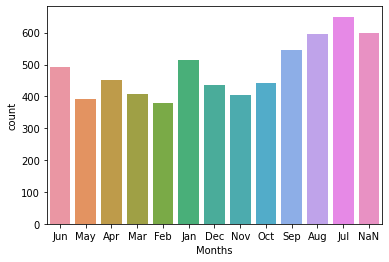

In [54]:
sns.countplot(x = shark_attack.Months);                        

In [55]:
shark_attack.sample(50)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Species_,Months
3942,27-Dec-1960,1960.0,Unprovoked,AUSTRALIA,New South Wales,"Bondi Beach, Sydney",NaN,Mrs. Despo Snow-Christensen,F,27,"Shark brushed past, minor injuries if any",N,NaN,3 m [10'] shark,Dec
498,Reported 12-Sep-2014,2014.0,Unprovoked,FRENCH POLYNESIA,Moorea,Tiahura Lagoon,Feeding fish,female,F,36,Thumb & finger nipped,N,NaN,Blacktip shark,Sep
4137,05-Oct-1958,1958.0,Unprovoked,USA,Florida,"Baker's Haulover, Miami Beach",NaN,Lytton Evans,M,60,No injury,N,NaN,NaN,Oct
5763,1886,1886.0,Unprovoked,AUSTRALIA,New South Wales,Sydney Harbor,Sailing,male,M,NaN,Leg severed,N,Afternoon,NaN,NaN
471,Reported 03-Dec-2014,2014.0,Provoked,SPAIN,Granada,Off Motril,Fishing for blue sharks,male,M,NaN,Glancing bite to wrist from netted shark PROVO...,N,07h00,NaN,Dec
5605,Reported 04-Dec-1897,1897.0,Provoked,USA,East coast,NaN,Angling,a sailor,M,NaN,Hooked shark bit his leg PROVOKED INCIDENT,N,NaN,NaN,Dec
2457,09-Jan-1994,1994.0,Unprovoked,AUSTRALIA,Queensland,"Katana Downs Reach, Brisbane River","Swimming, after falling off towed kneeboard",Gary Cochrane,M,23,Hamstring bitten,N,NaN,1.5 m shark,Jan
379,10-Aug-2015,2015.0,Provoked,USA,California,Cortes Bank,Spearfishing,Richard Shafer,M,57,Right hand bitten PROVOKED INCIDENT,N,08h00,Hammerhead shark. 6' to 7',Aug
2251,02-Jun-1997,1997.0,Unprovoked,USA,Florida,"Daytona Beach Shores, Volusia County","Body surfing, stood up on sandbar",Doug Amelio,M,33,4 lacerations above left ankle,N,10h25,1.2 m [4'] shark (spinner shark?),Jun
3433,24-May-1969,1969.0,Provoked,USA,Florida,Sarasota County,Diving,Brian Martel,M,23,Laceration to buttocks Recorded as PROVOKED IN...,N,11h00,Nurse shark,May


In [56]:
#condition_1 = shark_attack["Date"] == "Jan"
#condition_2 = shark_attack["Date"] == "Feb"
#condition_3 = shark_attack["Date"] == "Mar"
#condition_4 = shark_attack["Date"] == "Apr"
#condition_5 = shark_attack["Date"] == "May"
#condition_6 = shark_attack["Date"] == "Jun"
#condition_7 = shark_attack["Date"] == "Jul"
#condition_8 = shark_attack["Date"] == "Aug"
#condition_9 = shark_attack["Date"] == "Sep"
#condition_10 = shark_attack["Date"] == "Oct"
#condition_11 = shark_attack["Date"] == "Nov"
#condition_12 = shark_attack["Date"] == "Dec"

In [57]:
#condis = shark_attack.loc[(shark_attack["Date"] == "Jan") & (shark_attack["Date"] == "Apr")]
#condis.head()

In [58]:
shark_attack.sample()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Species_,Months
3689,28-Mar-1964,1964.0,Sea Disaster,PAPUA NEW GUINEA,Central Province,30 miles from Port Moresby,"Canoe capsized with 10 occupants, 8 survived, ...",Donald Hamilton,M,32,Presumed FATAL,Y,Midnight,NaN,Mar


In [59]:
shark_attack["Months"].value_counts()

Jul    650
NaN    598
Aug    597
Sep    547
Jan    513
Jun    491
Apr    450
Oct    441
Dec    435
Mar    406
Nov    403
May    392
Feb    379
Name: Months, dtype: int64

### Cleaning "Species_"

In [60]:
shark_attack['Species_'].value_counts().sample(5)

Salmon shark                                                     2
Nurse shark, 1.5 m [5']                                          1
Thought to involve an oceanic whitetip shark or a white shark    1
Tiger shark, 13'                                                 1
Silvertip shark                                                  1
Name: Species_, dtype: int64

Create a new copy of the column Species_

In [61]:
shark_attack["Species"] = shark_attack["Species_"]

Create all the elements inside the column strings.

In [62]:
for i in shark_attack["Species"]:
    i = str(i)

In [63]:
shark_attack["Species"] = shark_attack["Species"].astype("str")

In [64]:
shark_attack["Species"].dtype

dtype('O')

In [65]:
list(shark_attack["Species"])

['White shark',
 'nan',
 'nan',
 '2 m shark',
 'Tiger shark, 3m',
 'nan',
 'Tiger shark',
 "Lemon shark, 3'",
 "Bull shark, 6'",
 'nan',
 'Grey reef shark',
 'nan',
 'nan',
 'Invalid incident',
 'Tawny nurse shark, 2m',
 'nan',
 'Shark involvement not confirmed',
 'nan',
 'Tiger shark',
 'nan',
 'Questionable',
 '3 m shark',
 'White shark, 3.5 m',
 'Tiger shark',
 'White shark, 2.5 m',
 "6' shark",
 'Juvenile bull shark',
 'nan',
 'nan',
 'nan',
 'Tiger shark',
 'Shark involvement not confirmed',
 '2 m shark',
 'Bull shark',
 'White shark',
 "Tiger shark, 12'",
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark,  2.7 to 3.2 m',
 'nan',
 'Bull shark, 2 m',
 'Possibly a wobbegong',
 'Injury believed caused by an eel, not a shark',
 'Galapagos shark?',
 '2m shark',
 'Bull shark',
 'Bull shark, 3 m ',
 'Grey reef shark. 2 m',
 'White shark, 3.5 m',
 'small shark',
 'Wobbegong shark?',
 'Tiger shark',
 'nan',
 'Juvenile nurse shark',
 "Nurse shark.

Start making a cleanning of the strings, making some filters to be easier after.

In [66]:
shark_attack['Species'] = shark_attack['Species'].str.lower()

In [67]:
shark_attack['Species'] = shark_attack['Species'].str.replace(" ", "")

In [68]:
shark_attack['Species'] = shark_attack['Species'].str.replace(".", "")

C:\Users\ima_n\AppData\Local\Temp\ipykernel_21568\1078038443.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shark_attack['Species'] = shark_attack['Species'].str.replace(".", "")


In [69]:
shark_attack['Species'] = shark_attack['Species'].str.replace("to", "")

In [70]:
shark_attack['Species'] = shark_attack['Species'].str.replace(",", "")

In [71]:
shark_attack['Species'] = shark_attack['Species'].str.replace("'", "")

In [72]:
shark_attack['Species'] = shark_attack['Species'].str.replace('"', "")

In [73]:
shark_attack['Species'] = shark_attack['Species'].str.replace("m", "")

In [74]:
shark_attack['Species'] = shark_attack['Species'].str.replace("juvenile", "")

In [75]:
shark_attack['Species'] = shark_attack['Species'].str.replace(r'\d', "").replace("-", "")

C:\Users\ima_n\AppData\Local\Temp\ipykernel_21568\260194922.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  shark_attack['Species'] = shark_attack['Species'].str.replace(r'\d', "").replace("-", "")


In [76]:
shark_attack['Species'].value_counts()

nan                                                                                                  2838
shark                                                                                                 465
whiteshark                                                                                            312
[]shark                                                                                               293
tigershark                                                                                            138
                                                                                                     ... 
thoughinvolveatigershark                                                                                1
tigershark-kg[-lb]                                                                                      1
possiblyatigershark                                                                                     1
cc[]blacktiporspinnershark                    

Create a loop to change all the elements in the column for the ones that i really need.
Have to change the column into a list so i can work with them.

In [77]:
species_lst = list(shark_attack['Species'])

In [78]:
spc = ["whiteshark", "tigershark", "bullshark", "wobbegongshark", "blacktipshark", "nurseshark", "spinnershark", "reefshark", "galapagosshark", "blueshark", "porbeagleshark", "goblinshark"]
x = []
for i in species_lst:
    if i in spc:
        x.append(i)
    else:
        x.append("NaN")

Result is saved as a list, have to change it to a panda series so it can be added to the data frame.

In [79]:
spc_serie = pd.Series(x)

In [80]:
shark_attack['Species'] = spc_serie

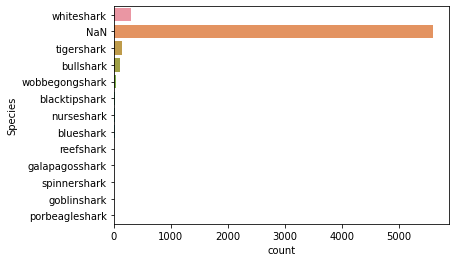

In [81]:
sns.countplot(y = shark_attack.Species);                        

will go to eliminate the columns copied columns, we dont need them anymore and they were kept dirty

In [82]:
shark_attack.drop(columns =['Species_', 'Date'], inplace=True, axis=1)

In [156]:
white = shark_attack[(shark_attack.Species=="whiteshark") | (shark_attack.Species=="tigershark") | (shark_attack.Species=="bullshark") | (shark_attack.Species=="blacktipshark") | (shark_attack.Species=="wobbegongshark") | (shark_attack.Species=="spinnershark")]
white

,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species
0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,Jun,whiteshark
4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Jun,tigershark
6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Jun,tigershark
8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,May,bullshark
18,2018.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,male,M,30,"No injury, shark bit scuba gear",N,10h40,Apr,tigershark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N,Afternoon,NaN,bullshark
6244,0.0,Unprovoked,BAHAMAS,Andros Islands,NaN,NaN,"male, a sponge Diver",M,NaN,Lower leg and forearm severed,N,NaN,NaN,whiteshark
6265,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,13 or 14,"FATAL, left leg bitten with severe blood loss",Y,Afternoon,NaN,bullshark
6274,0.0,Boat,ITALY,Adriatic Sea,NaN,Wooden fishing boat,Occupant: Mr. Maciotta,M,NaN,No injury to occupant; shark capsized boat,N,NaN,NaN,whiteshark


### New column of season of mating

In [160]:
mating_ = {"whiteshark":["Nov", "Dec", "Jan"], "tigershark":["Aug", "Sep", "Oct"], "bullshark":["May", "Jun", "Jul"], "blacktipshark":["Nov", "Dic", "Jan", "Feb"], "wobbegongshark":["Oct", "Nov", "Dic", "Jan", "Feb"], "spinnershark":["Jun", "Jul"] }

In [161]:
def mating (esp, mes):
    if mes in mating_[esp]:
        return True
    else:
        return False
#if key == Species and Months in mating_.values():

In [162]:
shark_attack["Species"].value_counts()

NaN               5593
whiteshark         312
tigershark         138
bullshark          114
wobbegongshark      33
blacktipshark       30
nurseshark          27
blueshark           24
spinnershark        12
reefshark            8
galapagosshark       5
porbeagleshark       4
goblinshark          2
Name: Species, dtype: int64

In [163]:
white["mating"] = list(map(mating, white["Species"], white["Months"]))

C:\Users\ima_n\AppData\Local\Temp\ipykernel_21568\1907746515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white["mating"] = list(map(mating, white["Species"], white["Months"]))


In [164]:
white.sample()

,Year,Type,Country,Area,Location,Activity,Name,Sex_,Age,Injury,Fatal_(y/n),Time,Months,Species,mating
389,2015.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Jeffrey's Bay,Surfing,Mick Fanning,M,34,No injury,N,NaN,Jul,whiteshark,False


In [119]:
mating("whiteshark", "Nov")

True

In [88]:
example = shark_attack.copy()

In [89]:
example.dropna(inplace=True)

In [90]:
example.apply(lambda x: x["Species"])

KeyError: 'Species'

In [112]:
for i in shark_attack["Species"]:
    str(i)

In [124]:
shark_attack["Months"].isna().sum()

0

In [146]:
white["mating"] = white.apply(lambda row: mating (row["Species"], row["Months"], axis=1))

KeyError: 'Species'

In [ ]:
shark_attack.sample()

In [ ]:
shark_attack["Time"].head()

In [ ]:
for i in shark_attack["Time"]:
    str(i)

try to clean the time to only have numbers

In [ ]:
shark_attack['Species'] = shark_attack['Species'].str.replace(r'\d', "").replace("-", "")

In [ ]:
def time(Time):
    for i in "Time":
        if i == "\d+h":
            return i
        else: 
            return "NaN"

In [ ]:
Lambda 

In [ ]:
lst = list(shark_attack["Time"])
x = []
regex = re.compile(r"\d+h")
for i in lst:
    if i == regex:
        x.append(i)
    else: 
        x.append("NaN")

Export the final work, cleaned data frame with the information need it.

### Cleaning country

In [ ]:
shark_attack.sample()

In [ ]:
shark_attack.Country.value_counts()

In [ ]:
shark_attack.to_csv("D:\\ironhack\\proyectos\\SharkAttack_proy1\DATA\\clean_attack2.csv")